In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
student = pd.read_csv('StudentsPerformance.csv')

In [54]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
student.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [56]:
student.gender = student.gender.apply(lambda x:1 if x == 'male' else 0)
student['preparation'] = student['test preparation course']
student.preparation = student.preparation.apply(lambda x:1 if x == 'completed' else 0)
student = student.drop('test preparation course',axis = 1)

In [57]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,preparation
0,0,group B,bachelor's degree,standard,none,72,72,74,0
1,0,group C,some college,standard,completed,69,90,88,1
2,0,group B,master's degree,standard,none,90,95,93,0
3,1,group A,associate's degree,free/reduced,none,47,57,44,0
4,1,group C,some college,standard,none,76,78,75,0


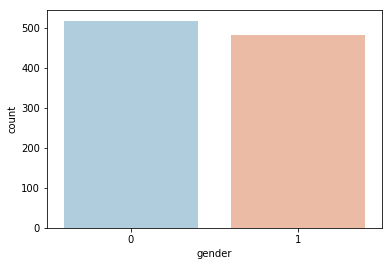

In [58]:
sns.countplot(x='gender',data=student,palette='RdBu_r')

In [96]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,preparation,average_score,parent_education
0,0,group B,bachelor's degree,standard,72,72,74,0,73.0,5
1,0,group C,some college,standard,69,90,88,1,82.0,3
2,0,group B,master's degree,standard,90,95,93,0,93.0,6
3,1,group A,associate's degree,free/reduced,47,57,44,0,49.0,4
4,1,group C,some college,standard,76,78,75,0,76.0,3


In [68]:
student['average_score'] = (student['math score']+student['writing score']+student['reading score'])/3

In [70]:
student['average_score'] = student['average_score'].round()

In [71]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,preparation,average_score
0,0,group B,bachelor's degree,standard,72,72,74,0,73.0
1,0,group C,some college,standard,69,90,88,1,82.0
2,0,group B,master's degree,standard,90,95,93,0,93.0
3,1,group A,associate's degree,free/reduced,47,57,44,0,49.0
4,1,group C,some college,standard,76,78,75,0,76.0


# Does parent's education play a vital role in a student's performance

In [72]:
student['parent_education'] = student['parental level of education']

In [73]:
print(student['parental level of education'].value_counts())

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [85]:
def rate(r):
    if r == 'some high school' :
        return 1
    elif r == 'high school' :
        return 2
    elif r == 'some college' :
        return 3
    elif r == "associate's degree" :
        return 4
    elif r == "bachelor's degree" :
        return 5
    elif r == "master's degree" :
        return 6
    else :
        return 0

In [86]:
student['parent_education'] = student['parent_education'].apply(rate)

In [106]:
student.head(30)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,preparation,average_score,parent_education
0,0,group B,bachelor's degree,1,72,72,74,0,73.0,5
1,0,group C,some college,1,69,90,88,1,82.0,3
2,0,group B,master's degree,1,90,95,93,0,93.0,6
3,1,group A,associate's degree,0,47,57,44,0,49.0,4
4,1,group C,some college,1,76,78,75,0,76.0,3
5,0,group B,associate's degree,1,71,83,78,0,77.0,4
6,0,group B,some college,1,88,95,92,1,92.0,3
7,1,group B,some college,0,40,43,39,0,41.0,3
8,1,group D,high school,0,64,64,67,1,65.0,2
9,0,group B,high school,0,38,60,50,0,49.0,2


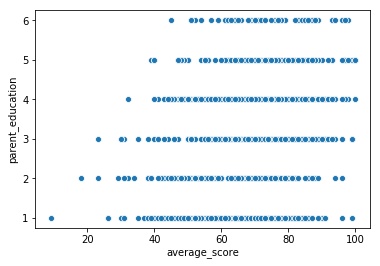

In [92]:
sns.scatterplot(x='average_score',y='parent_education',data = student,palette='warmcold')

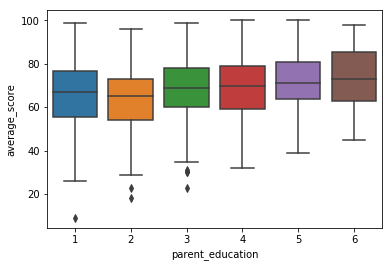

In [95]:
sns.boxplot(x='parent_education',y='average_score',data = student)

# Did preparation lead to a good score ?

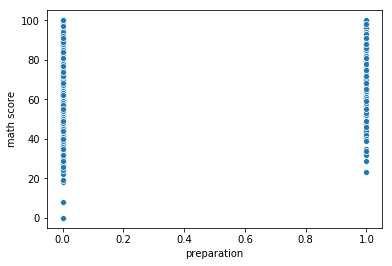

In [98]:
sns.scatterplot(x='preparation',y='math score',data = student)

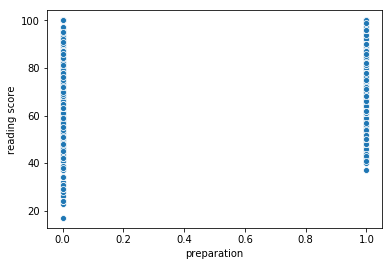

In [99]:
sns.scatterplot(x='preparation',y='reading score',data = student)

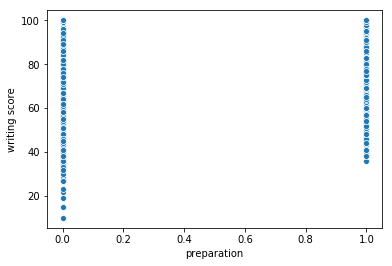

In [100]:
sns.scatterplot(x='preparation',y='writing score',data = student)

# Is the lunch provided properly to everyone

In [102]:
student.lunch = student.lunch.apply(lambda x:1 if x == 'standard' else 0)

In [105]:
print(student['race/ethnicity'].value_counts())

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


In [107]:
def rate1(r):
    if r == 'group A' :
        return 1
    elif r == 'group B' :
        return 2
    elif r == 'group C' :
        return 3
    elif r == "group D" :
        return 4
    elif r == "group E" :
        return 5
    else :
        return 0

In [108]:
student['race/ethnicity'] = student['race/ethnicity'].apply(rate1)

In [109]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,preparation,average_score,parent_education
0,0,2,bachelor's degree,1,72,72,74,0,73.0,5
1,0,3,some college,1,69,90,88,1,82.0,3
2,0,2,master's degree,1,90,95,93,0,93.0,6
3,1,1,associate's degree,0,47,57,44,0,49.0,4
4,1,3,some college,1,76,78,75,0,76.0,3


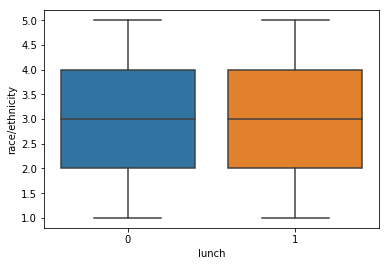

In [116]:
sns.boxplot(x='lunch',y='race/ethnicity',data = student)

In [118]:
def rate2(r):
    if r >= 50 :
        return 1
    else :
        return 0

In [119]:
student['Pass/Fail'] = student['average_score'].apply(rate2)

In [120]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,preparation,average_score,parent_education,Pass/Fail
0,0,2,bachelor's degree,1,72,72,74,0,73.0,5,1
1,0,3,some college,1,69,90,88,1,82.0,3,1
2,0,2,master's degree,1,90,95,93,0,93.0,6,1
3,1,1,associate's degree,0,47,57,44,0,49.0,4,0
4,1,3,some college,1,76,78,75,0,76.0,3,1


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X = student.drop('Pass/Fail',axis = 1)
Y = student['Pass/Fail']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Anisha Khetan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
predictions = logmodel.predict(X_test)

In [137]:
from sklearn.metrics import classification_report,confusion_matrix